In [116]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
#Find path
filename = r'C:\Users\Janea\Desktop\Shelter_data.xlsx'

In [118]:
#Load csv into dataframe 

shelter_data = pd.read_excel(filename)

In [119]:
shelter_data.head()

,State,Year,Organizations,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,...,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2021,5,886,1620,85,37,133,2217,365,...,144,763,948,0,3,6,7,0,80,82
1,AK,2022,5,1128,1878,51,42,146,2158,310,...,189,1106,1006,0,1,3,4,1,112,216
2,AK,2023,5,911,1814,45,42,122,2148,223,...,210,993,880,0,8,4,12,1,149,257
3,AL,2021,17,1548,3414,707,0,644,3816,78,...,1953,6577,2101,1,3592,90,180,7,7,2994
4,AL,2022,17,1419,3400,816,3,503,4307,65,...,2277,6681,2012,0,3190,808,193,14,0,3262


In [120]:
#Which states euthanize the most cats/dogs? 

def calculate_euthanasia_rate(row, animal_type):
    euthanasia = row[f'Other Outcome - Shelter Euthanasia Total-{animal_type}']
    total_outcomes = sum(row[col] for col in shelter_data.columns if col.startswith(f'Live Outcome') and col.endswith(f'-{animal_type}')) + \
                     sum(row[col] for col in shelter_data.columns if col.startswith(f'Other Outcome') and col.endswith(f'-{animal_type}'))
    return (euthanasia / total_outcomes) * 100 if total_outcomes > 0 else 0

In [121]:
# Highest adoption rates
def calculate_adoption_rate(row, animal_type):
    adoptions = row[f'Live Outcome - Adoption Total-{animal_type}']
    total_outcomes = sum(row[col] for col in shelter_data.columns if col.startswith(f'Live Outcome') and col.endswith(f'-{animal_type}')) + \
                     sum(row[col] for col in shelter_data.columns if col.startswith(f'Other Outcome') and col.endswith(f'-{animal_type}'))
    return (adoptions / total_outcomes) * 100 if total_outcomes > 0 else 0

In [122]:
#Define top and bottom of states
def print_top_bottom_states(data, column, n=5, ascending=False):
    top_states = data.sort_values(column, ascending=ascending).head(n)
    print(f"{'Top' if not ascending else 'Bottom'} {n} states:")
    for state, rate in top_states.iteritems():
        print(f"{state}: {rate:.2f}%")
    print()

In [123]:
#Euthanasia and adoption rates for cats and dogs 
shelter_data['Cat Euthanasia Rate'] = shelter_data.apply(lambda row: calculate_euthanasia_rate(row, 'Feline'), axis=1)
shelter_data['Dog Euthanasia Rate'] = shelter_data.apply(lambda row: calculate_euthanasia_rate(row, 'Canine'), axis=1)
shelter_data['Cat Adoption Rate'] = shelter_data.apply(lambda row: calculate_adoption_rate(row, 'Feline'), axis=1)
shelter_data['Dog Adoption Rate'] = shelter_data.apply(lambda row: calculate_adoption_rate(row, 'Canine'), axis=1)


print("\nCalculated rates:")
print(shelter_data[['Cat Euthanasia Rate', 'Dog Euthanasia Rate', 'Cat Adoption Rate', 'Dog Adoption Rate']].describe())




Calculated rates:
       Cat Euthanasia Rate  Dog Euthanasia Rate  Cat Adoption Rate  \
count           153.000000           153.000000         153.000000   
mean              7.987592             7.027579          68.986924   
std               5.151227             4.650968          13.016185   
min               0.916031             0.814664          24.122137   
25%               4.695325             3.883294          62.361125   
50%               6.713688             6.119102          70.112282   
75%               9.891447             9.481775          76.368591   
max              25.998573            28.482702          92.756904   

       Dog Adoption Rate  
count         153.000000  
mean           56.578383  
std            12.773887  
min            28.466220  
25%            49.082569  
50%            54.465409  
75%            64.516129  
max            91.342756  


In [124]:
#States rates 
state_rates = shelter_data.groupby('State')[['Cat Euthanasia Rate', 'Dog Euthanasia Rate', 'Cat Adoption Rate', 'Dog Adoption Rate']].mean()
state_rates


,Cat Euthanasia Rate,Dog Euthanasia Rate,Cat Adoption Rate,Dog Adoption Rate
State,,,,
AK,10.148914,8.119803,73.743941,42.970346
AL,23.721624,22.602963,60.766393,42.257023
AR,4.367887,6.611753,77.380451,48.561630
AZ,13.926950,6.315202,70.008867,65.412469
CA,15.744361,9.301229,63.563802,51.616036
CO,7.907670,7.138848,71.299227,56.326531
CT,3.109969,1.977308,72.902603,61.785356
DE,4.071753,3.276787,85.786373,90.318352
FL,7.367983,5.756906,67.728504,63.393978


In [125]:
state_rates = shelter_data.groupby('State')[['Cat Euthanasia Rate', 'Dog Euthanasia Rate', 'Cat Adoption Rate', 'Dog Adoption Rate']].mean()
state_rates['Overall Adoption Rate'] = (state_rates['Cat Adoption Rate'] + state_rates['Dog Adoption Rate']) / 2
state_rates

,Cat Euthanasia Rate,Dog Euthanasia Rate,Cat Adoption Rate,Dog Adoption Rate,Overall Adoption Rate
State,,,,,
AK,10.148914,8.119803,73.743941,42.970346,58.357144
AL,23.721624,22.602963,60.766393,42.257023,51.511708
AR,4.367887,6.611753,77.380451,48.561630,62.971040
AZ,13.926950,6.315202,70.008867,65.412469,67.710668
CA,15.744361,9.301229,63.563802,51.616036,57.589919
CO,7.907670,7.138848,71.299227,56.326531,63.812879
CT,3.109969,1.977308,72.902603,61.785356,67.343980
DE,4.071753,3.276787,85.786373,90.318352,88.052362
FL,7.367983,5.756906,67.728504,63.393978,65.561241


In [126]:
# Cat analysis

print("\n--- Cats Analysis ---")
print("\nTop 5 states that euthanize the most cats:")
print(state_rates.sort_values('Cat Euthanasia Rate', ascending=False)['Cat Euthanasia Rate'].head())

print("\nTop 5 states that euthanize the least cats:")
print(state_rates.sort_values('Cat Euthanasia Rate', ascending=True)['Cat Euthanasia Rate'].head())

print("\nTop 5 states with the highest cat adoption rates:")
print(state_rates.sort_values('Cat Adoption Rate', ascending=False)['Cat Adoption Rate'].head())

print("\nTop 5 states with the lowest cat adoption rates:")
print(state_rates.sort_values('Cat Adoption Rate', ascending=True)['Cat Adoption Rate'].head())


--- Cats Analysis ---

Top 5 states that euthanize the most cats:
State
AL    23.721624
HI    22.294446
NM    17.935498
NC    17.367442
NE    17.192944
Name: Cat Euthanasia Rate, dtype: float64

Top 5 states that euthanize the least cats:
State
RI    1.678353
ND    1.820401
SD    2.280980
ME    2.769835
NH    3.072842
Name: Cat Euthanasia Rate, dtype: float64

Top 5 states with the highest cat adoption rates:
State
MA    89.348834
VT    89.283323
ME    89.172033
NH    88.725366
DE    85.786373
Name: Cat Adoption Rate, dtype: float64

Top 5 states with the lowest cat adoption rates:
State
SD    29.461768
NM    45.142261
LA    45.749725
NV    46.350693
WV    49.395382
Name: Cat Adoption Rate, dtype: float64


In [127]:
# Dogs analysis
print("\n--- Dogs Analysis ---")
print("\nTop 5 states that euthanize the most dogs:")
print(state_rates.sort_values('Dog Euthanasia Rate', ascending=False)['Dog Euthanasia Rate'].head())

print("\nTop 5 states that euthanize the least dogs:")
print(state_rates.sort_values('Dog Euthanasia Rate', ascending=True)['Dog Euthanasia Rate'].head())

print("\nTop 5 states with the highest dog adoption rates:")
print(state_rates.sort_values('Dog Adoption Rate', ascending=False)['Dog Adoption Rate'].head())

print("\nTop 5 states with the lowest dog adoption rates:")
print(state_rates.sort_values('Dog Adoption Rate', ascending=True)['Dog Adoption Rate'].head())


--- Dogs Analysis ---

Top 5 states that euthanize the most dogs:
State
AL    22.602963
NM    20.647312
LA    15.863124
MI    10.890191
TN    10.591566
Name: Dog Euthanasia Rate, dtype: float64

Top 5 states that euthanize the least dogs:
State
SD    1.392528
ND    1.654929
PR    1.771978
CT    1.977308
WY    2.448771
Name: Dog Euthanasia Rate, dtype: float64

Top 5 states with the highest dog adoption rates:
State
DE    90.318352
MA    81.365472
NY    77.201533
VT    75.848468
OH    75.625003
Name: Dog Adoption Rate, dtype: float64

Top 5 states with the lowest dog adoption rates:
State
LA    32.272623
NV    33.854784
WV    35.624506
NM    35.681818
MS    39.640475
Name: Dog Adoption Rate, dtype: float64


In [128]:
#What states euthanize the most cats
print("\nTop 5 states that euthanize the most cats:")
print(state_rates.sort_values('Cat Euthanasia Rate', ascending=False)['Cat Euthanasia Rate'].head())


Top 5 states that euthanize the most cats:
State
AL    23.721624
HI    22.294446
NM    17.935498
NC    17.367442
NE    17.192944
Name: Cat Euthanasia Rate, dtype: float64


In [129]:
#What staes euthanize the most dogs
print("\nTop 5 states that euthanize the most dogs:")
print(state_rates.sort_values('Dog Euthanasia Rate', ascending=False)['Dog Euthanasia Rate'].head())


Top 5 states that euthanize the most dogs:
State
AL    22.602963
NM    20.647312
LA    15.863124
MI    10.890191
TN    10.591566
Name: Dog Euthanasia Rate, dtype: float64


In [130]:
#What states have the highest adoption rates (cats and dogs)

state_rates['Overall Adoption Rate'] = (state_rates['Cat Adoption Rate'] + state_rates['Dog Adoption Rate']) / 2
print("\nTop 5 states with the highest overall adoption rates:")
print(state_rates.sort_values('Overall Adoption Rate', ascending=False)['Overall Adoption Rate'].head())


Top 5 states with the highest overall adoption rates:
State
DE    88.052362
MA    85.357153
VT    82.565895
ME    80.973750
OH    80.614228
Name: Overall Adoption Rate, dtype: float64


In [131]:
#States with lowest adoption (cats and dogs)
print("\nTop 5 states with the lowest overall adoption rates:")
print(state_rates.sort_values('Overall Adoption Rate', ascending=True)['Overall Adoption Rate'].head())


Top 5 states with the lowest overall adoption rates:
State
SD    37.914001
LA    39.011174
NV    40.102738
NM    40.412039
WV    42.509944
Name: Overall Adoption Rate, dtype: float64


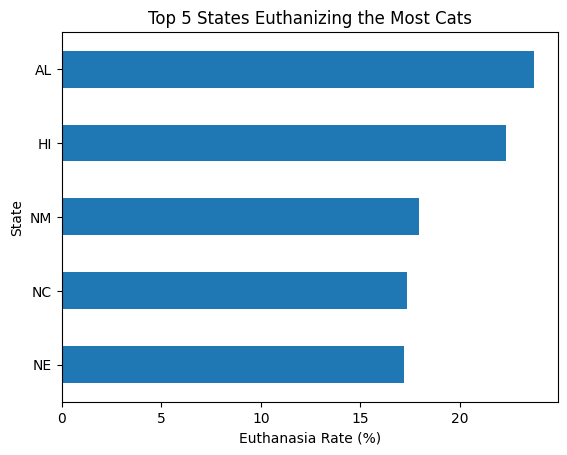

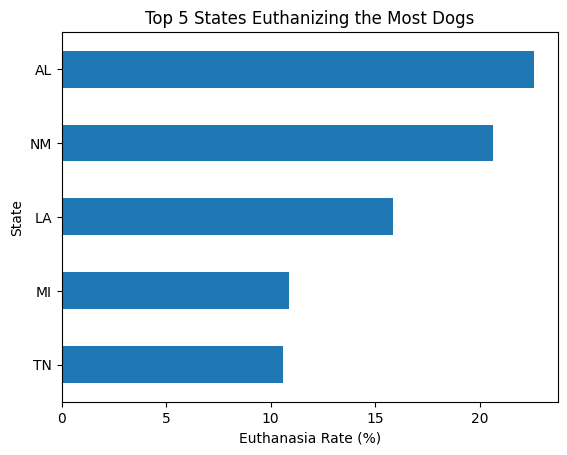

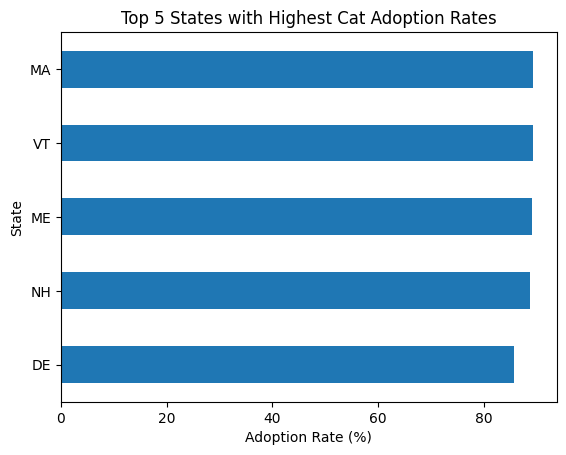

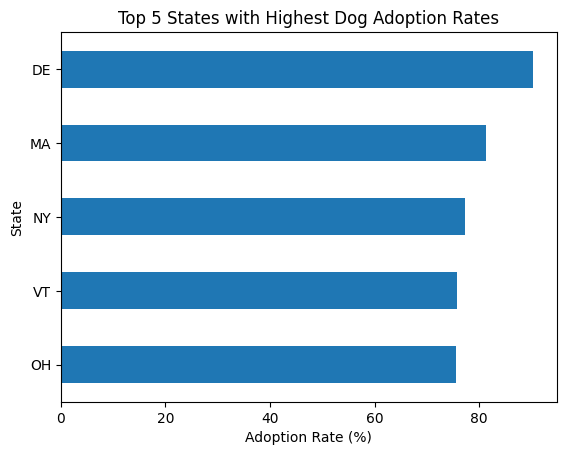

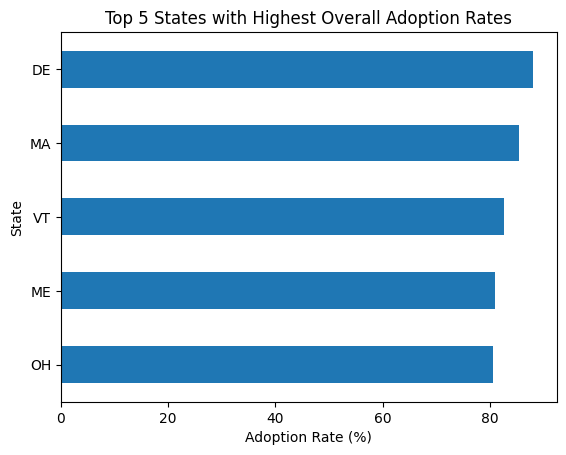

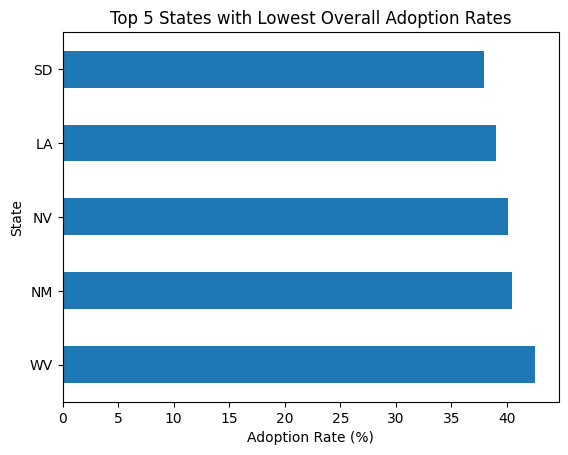

In [132]:
def plot_horizontal_bar(data, column, title, xlabel, ylabel='State', top_n=5, ascending=False):
    data = data.sort_values(column, ascending=ascending).head(top_n)
    data[column].plot(kind='barh')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()


plot_horizontal_bar(state_rates, 'Cat Euthanasia Rate', 'Top 5 States Euthanizing the Most Cats', 'Euthanasia Rate (%)', top_n=5, ascending=False)
plot_horizontal_bar(state_rates, 'Dog Euthanasia Rate', 'Top 5 States Euthanizing the Most Dogs', 'Euthanasia Rate (%)', top_n=5, ascending=False)
plot_horizontal_bar(state_rates, 'Cat Adoption Rate', 'Top 5 States with Highest Cat Adoption Rates', 'Adoption Rate (%)', top_n=5, ascending=False)
plot_horizontal_bar(state_rates, 'Dog Adoption Rate', 'Top 5 States with Highest Dog Adoption Rates', 'Adoption Rate (%)', top_n=5, ascending=False)
plot_horizontal_bar(state_rates, 'Overall Adoption Rate', 'Top 5 States with Highest Overall Adoption Rates', 'Adoption Rate (%)', top_n=5, ascending=False)
plot_horizontal_bar(state_rates, 'Overall Adoption Rate', 'Top 5 States with Lowest Overall Adoption Rates', 'Adoption Rate (%)', top_n=5, ascending=True)

In [133]:
#Has there been an increase in adoptions? 

# Calculate euthanasia and adoption rates
def calculate_euthanasia_rate(row, animal_type):
    euthanasia = row[f'Other Outcome - Shelter Euthanasia Total-{animal_type}']
    total_outcomes = sum(row[col] for col in shelter_data.columns if col.startswith(f'Live Outcome') and col.endswith(f'-{animal_type}')) + \
                     sum(row[col] for col in shelter_data.columns if col.startswith(f'Other Outcome') and col.endswith(f'-{animal_type}'))
    return (euthanasia / total_outcomes) * 100 if total_outcomes > 0 else 0

def calculate_adoption_rate(row, animal_type):
    adoptions = row[f'Live Outcome - Adoption Total-{animal_type}']
    total_outcomes = sum(row[col] for col in shelter_data.columns if col.startswith(f'Live Outcome') and col.endswith(f'-{animal_type}')) + \
                     sum(row[col] for col in shelter_data.columns if col.startswith(f'Other Outcome') and col.endswith(f'-{animal_type}'))
    return (adoptions / total_outcomes) * 100 if total_outcomes > 0 else 0

shelter_data['Cat Adoption Rate'] = shelter_data.apply(lambda row: calculate_adoption_rate(row, 'Feline'), axis=1)
shelter_data['Dog Adoption Rate'] = shelter_data.apply(lambda row: calculate_adoption_rate(row, 'Canine'), axis=1)

In [134]:
#Group by year and find adoption rates 
adoption_rates_over_time = shelter_data.groupby('Year')[['Cat Adoption Rate', 'Dog Adoption Rate']].mean()

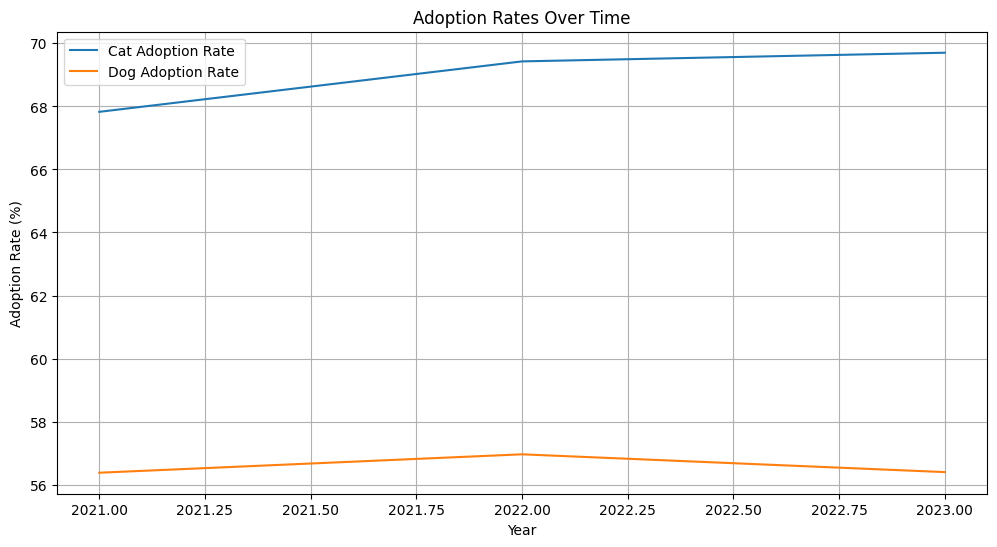

In [135]:
#Plot adoption rates over time
plt.figure(figsize=(12, 6))
plt.plot(adoption_rates_over_time.index, adoption_rates_over_time['Cat Adoption Rate'], label='Cat Adoption Rate')
plt.plot(adoption_rates_over_time.index, adoption_rates_over_time['Dog Adoption Rate'], label='Dog Adoption Rate')
plt.xlabel('Year')
plt.ylabel('Adoption Rate (%)')
plt.title('Adoption Rates Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [136]:
#Check for increase in adoption rates
adoption_rates_over_time['Overall Adoption Rate'] = (adoption_rates_over_time['Cat Adoption Rate'] + adoption_rates_over_time['Dog Adoption Rate']) / 2
increase_in_adoptions = adoption_rates_over_time['Overall Adoption Rate'].diff().dropna()

print("Yearly increase in adoption rates:")
print(increase_in_adoptions)

Yearly increase in adoption rates:
Year
2022    1.092328
2023   -0.144680
Name: Overall Adoption Rate, dtype: float64


In [137]:
#Group by state and year, to calculate mean adoption rates
state_year_rates = shelter_data.groupby(['State', 'Year'])[['Cat Adoption Rate', 'Dog Adoption Rate']].mean().reset_index()
state_year_rates['Overall Adoption Rate'] = (state_year_rates['Cat Adoption Rate'] + state_year_rates['Dog Adoption Rate']) / 2

In [138]:
#Group by state and find mean adoption rates 
state_rates = shelter_data.groupby('State')[['Cat Adoption Rate', 'Dog Adoption Rate']].mean()
state_rates['Overall Adoption Rate'] = (state_rates['Cat Adoption Rate'] + state_rates['Dog Adoption Rate']) / 2

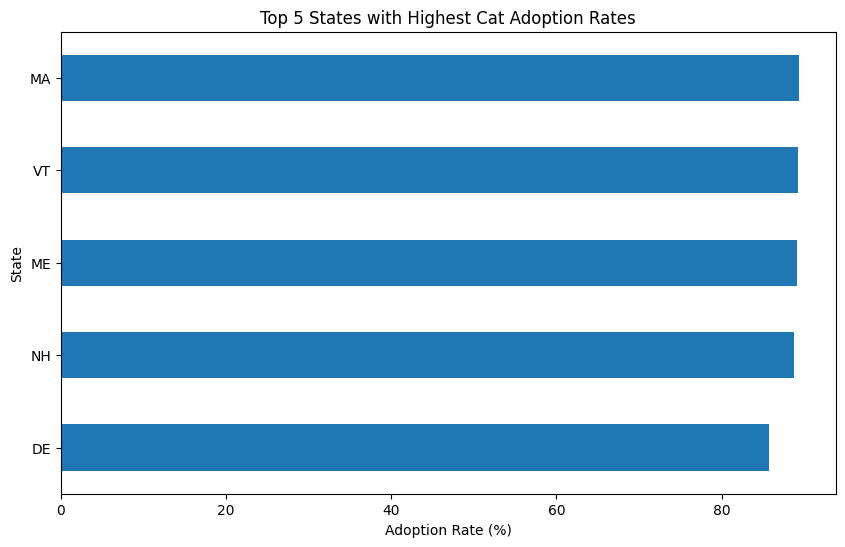

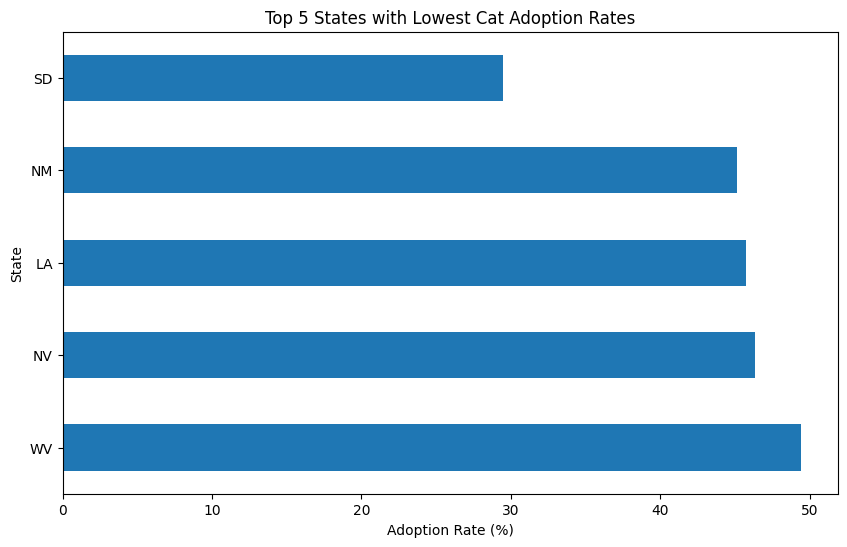

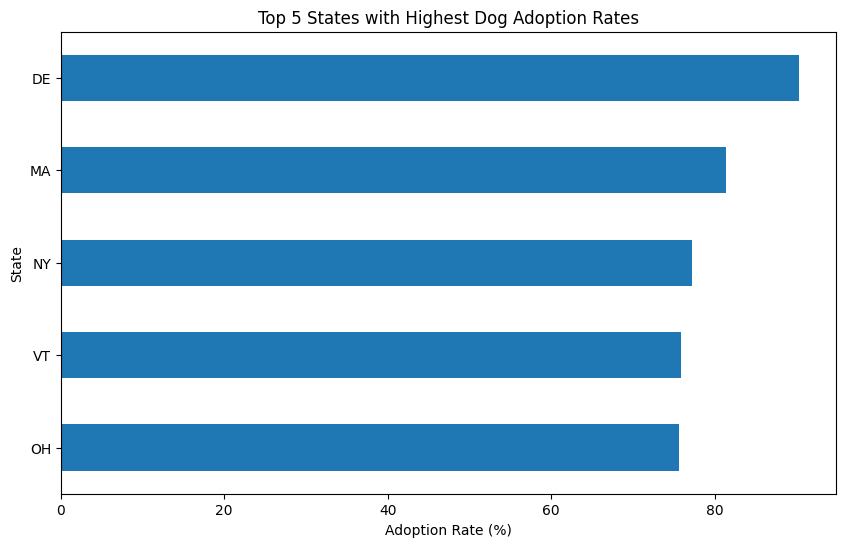

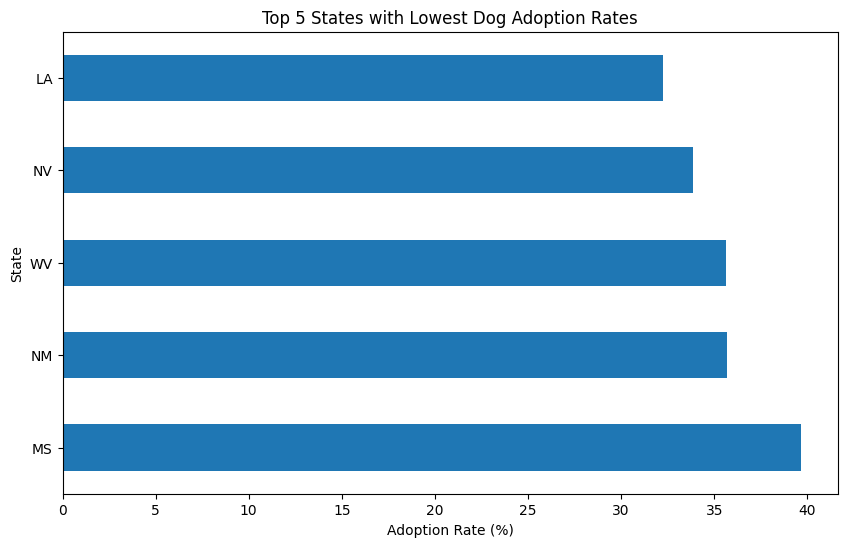

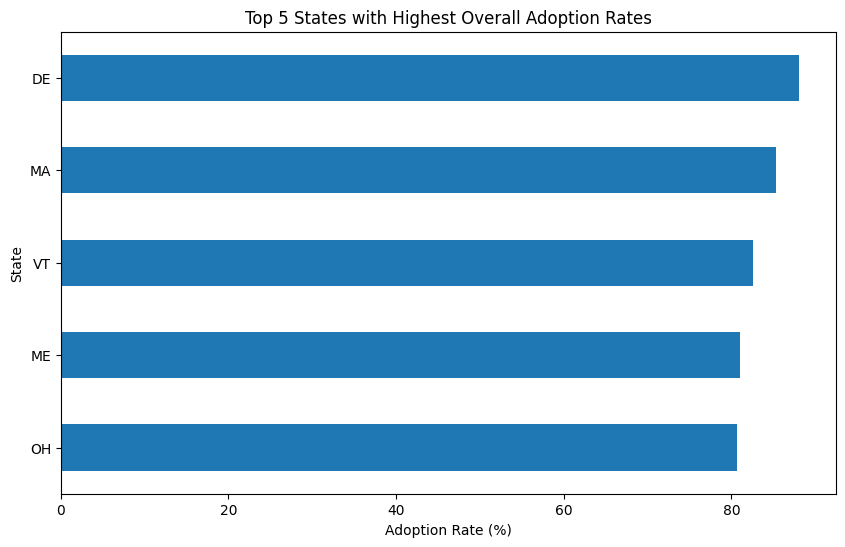

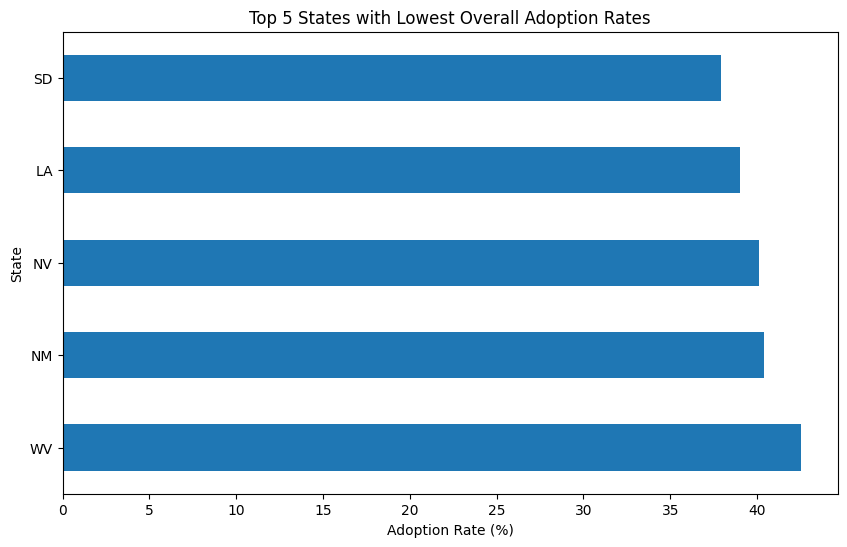

In [139]:
#Make a horizonatal bar chart 

def plot_horizontal_bar(data, column, title, xlabel, ylabel='State', top_n=5, ascending=False):
    data = data.sort_values(column, ascending=ascending).head(top_n)
    data[column].plot(kind='barh', figsize=(10, 6))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Plot top and bottom states
top_n = 5
plot_horizontal_bar(state_rates, 'Cat Adoption Rate', 'Top 5 States with Highest Cat Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=False)
plot_horizontal_bar(state_rates, 'Cat Adoption Rate', 'Top 5 States with Lowest Cat Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=True)
plot_horizontal_bar(state_rates, 'Dog Adoption Rate', 'Top 5 States with Highest Dog Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=False)
plot_horizontal_bar(state_rates, 'Dog Adoption Rate', 'Top 5 States with Lowest Dog Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=True)
plot_horizontal_bar(state_rates, 'Overall Adoption Rate', 'Top 5 States with Highest Overall Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=False)
plot_horizontal_bar(state_rates, 'Overall Adoption Rate', 'Top 5 States with Lowest Overall Adoption Rates', 'Adoption Rate (%)', top_n=top_n, ascending=True)

In [140]:
import seaborn as sns

In [141]:
# Filter data for a specific state
state_data = shelter_data[shelter_data['State'] == 'MN']

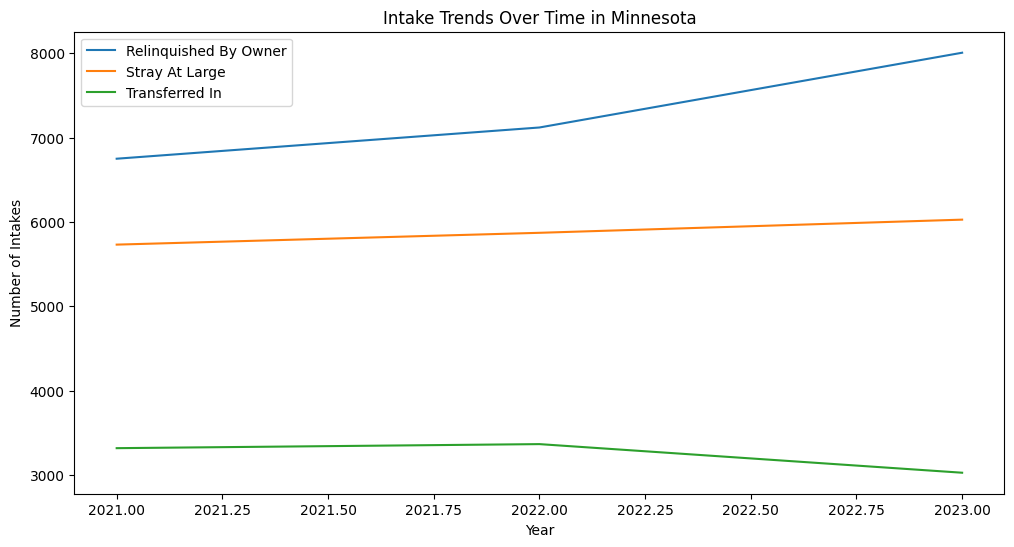

In [142]:
# Plotting intake trends over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Intake - Relinquished By Owner Total-Feline', data=state_data, label='Relinquished By Owner')
sns.lineplot(x='Year', y='Intake - Stray At Large Total-Feline', data=state_data, label='Stray At Large')
sns.lineplot(x='Year', y='Intake - Transferred In Total-Feline', data=state_data, label='Transferred In')
plt.title('Intake Trends Over Time in Minnesota')
plt.xlabel('Year')
plt.ylabel('Number of Intakes')
plt.legend()
plt.show()

In [144]:
#Going to highlight Minnesota

shelter_data = pd.read_excel(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'Shelter_data.csv'